## WORKING WITH TEXT DATA

deep-learning models don’t take as input raw text: they only work with numeric tensors

“The cat sat on the mat.” It may be decomposed into the following set of 2-grams:

`{"The", "The cat", "cat", "cat sat", "sat", "sat on", "on", "on the", "the", "the mat", "mat"}`

It may also be decomposed into the following set of 3-grams:

```
{"The", "The cat", "cat", "cat sat", "The cat sat",
  "sat", "sat on", "on", "cat sat on", "on the", "the",
  "sat on the", "the mat", "mat", "on the mat"}
```

### One-hot encoding of words and characters

In [1]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']      

token_index = {}                                                       
for sample in samples:
    for word in sample.split():                                        
        if word not in token_index:
            token_index[word] = len(token_index) + 1                   

max_length = 10                                                        
# we only consider the first max_length words in each sample.

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))#!!!! +1

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [2]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [3]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [4]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable                                           
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1)) #!!!!! +1
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [5]:
results[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
string.printable        

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [7]:
token_index.values()

dict_values(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c'])

In [8]:
list_a = [1, 2, 3, 4, 5]
list_b = ['a', 'b', 'c', 'd', 'e']

zipped_list = zip(list_a, list_b)
print(dict(zipped_list))

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}


In [9]:
list_a = [1,2,3,4,5,6]
list_b = "abcdef"

zipped_list = zip(list_a, list_b)
print(dict(zipped_list))

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}


In [10]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
# Creates a tokenizer, configured to only take into account the 1000 most common words

tokenizer.fit_on_texts(samples)                                         

sequences = tokenizer.texts_to_sequences(samples)                       

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')     

word_index = tokenizer.word_index                                       
print('Found %s unique tokens.' % len(word_index))

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 9 unique tokens.


In [14]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [11]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [12]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
one_hot_results.shape

(2, 1000)

In [15]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000   
# If you have close to 1,000 words (or more), you’ll see many hash collisions, which will decrease the accuracy of this encoding method.
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality                      
        results[i, j, index] = 1.

In [17]:
results.shape
# (len(samples), max_length, dimensionality)

(2, 10, 1000)

In [23]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [24]:
results[:,:,0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Learning word embeddings with the Embedding layer

In [20]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)           
# The Embedding layer takes at least two arguments: 
#    the number of possible tokens (e.g. 1,000: 1 + maximum_word_index) 
#    and the dimensionality of the embeddings (e.g. 64).
# The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors.

In [42]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000                                                             

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)                                              

print("before padding x_train shape = ", x_train.shape)

before padding x_train shape =  (25000,)


In [43]:
print(x_train[0][:20])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


In [45]:
maxlen = 20 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)    
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print("after padding x_train shape = ", x_train.shape)

after padding x_train shape =  (25000, 20)


In [46]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [48]:
y_train.shape

(25000,)

In [50]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [47]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

model.add(Embedding(10000, 8, input_length=maxlen)) # (samples, sequence_length=10000, embedding_dimensionality=8)

model.add(Flatten())                                                        

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(x_train, y_train, epochs=10,batch_size=32,validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 99us/step - loss: 0.6759 - acc: 0.6047 - val_loss: 0.6398 - val_acc: 0.6804
Epoch 2/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.5658 - acc: 0.7425 - val_loss: 0.5468 - val_acc: 0.7200
Epoch 3/10
20000/20000 [==============================] - 2s 77us/step - loss: 

You get to a validation accuracy of ~88%, which is pretty good considering that you’re only looking at the first 20 words in every review. But it's much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole. 

### Putting it all together: from raw text to word embeddings

First, head to http://mng.bz/0tIo and download the raw IMDB dataset. Uncompress it.

In [51]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [52]:
len(texts)

25000

In [53]:
len(labels)

25000

In [54]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [55]:
labels[0]

0

In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100                                           
training_samples = 200                                 
validation_samples = 10000                             
max_words = 10000                                      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [60]:
print(sequences[0])

[62, 4, 3, 129, 34, 44, 7576, 1414, 15, 3, 4252, 514, 43, 16, 3, 633, 133, 12, 6, 3, 1301, 459, 4, 1751, 209, 3, 7693, 308, 6, 676, 80, 32, 2137, 1110, 3008, 31, 1, 929, 4, 42, 5120, 469, 9, 2665, 1751, 1, 223, 55, 16, 54, 828, 1318, 847, 228, 9, 40, 96, 122, 1484, 57, 145, 36, 1, 996, 141, 27, 676, 122, 1, 411, 59, 94, 2278, 303, 772, 5, 3, 837, 20, 3, 1755, 646, 42, 125, 71, 22, 235, 101, 16, 46, 49, 624, 31, 702, 84, 702, 378, 3493, 2, 8422, 67, 27, 107, 3348]


In [73]:
len(sequences)

25000

In [82]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
print("Before data shape=", data.shape)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])# return an array of 25000 (exclusive) elements                    
np.random.shuffle(indices)

data = data[indices]
print("After data shape=", data.shape)

labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Before data shape= (25000, 100)
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)
After data shape= (25000, 100)


In [83]:
data.shape

(25000, 100)

In [84]:
data[[0]].shape

(1, 100)

In [85]:
data[0].shape

(100,)

In [86]:
indices

array([ 2501,  4853,  2109, ...,  2357, 22166, 12397])

In [87]:
indices.shape

(25000,)

In [88]:
x_train.shape
# (samples, sequence_length)

(200, 100)

In [89]:
y_train.shape

(200,)

Go to https://nlp.stanford.edu/projects/glove, and download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called `glove.6B.zip`, containing *100-dimensional* embedding vectors for 400,000 words (or nonword tokens). Unzip it.

In [90]:
glove_dir = 'glove.6B'

embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32') # np.array(line[1:], dtype=np.float64)
        embeddings_index[word] = coefs

In [94]:
print('Found {} word vectors.'.format(len(embeddings_index)))

Found 400000 word vectors.


In [101]:
embedding_dim = 100

# max_words = max_words_samples
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words: # 10000 
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [96]:
embedding_matrix.shape
# we have 999 word

(10000, 100)

In [103]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [104]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # 10000, 100, input_length=100 =(None, 100,100)
# the activations have shape of (200, 100, embedding_dim=100)
model.add(Flatten())
# flatten (samples=200, maxlen=100 * embedding_dim=100)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [106]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.4634 - acc: 0.4400 - val_loss: 0.8979 - val_acc: 0.4985
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5923 - acc: 0.7200 - val_loss: 0.8722 - val_acc: 0.5025
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5509 - acc: 0.6800 - val_loss: 0.8166 - val_acc: 0.4987
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3469 - acc: 0.9100 - val_loss: 0.7501 - val_acc: 0.5012
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3379 - acc: 0.8250 - val_loss: 0.7581 - val_acc: 0.5028
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2546 - acc: 0.9550 - val_loss: 0.9584 - val_acc: 0.4997
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1975 - acc: 0.9800 - val_loss: 0.7761 - val_acc: 0.5052
Epoch 8/10
200/200 [========

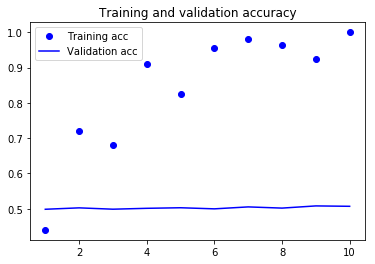

In [108]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

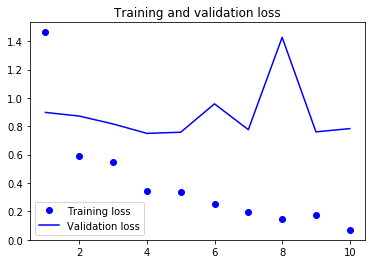

In [109]:
plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of training samples. Validation accuracy has high variance for the same reason, but it seems to reach the high 50s.

In [110]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6928 - acc: 0.5400 - val_loss: 0.6935 - val_acc: 0.5029
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5044 - a

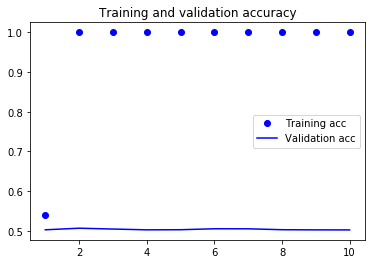

In [111]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings outperform jointly learned embeddings. 

In [112]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [113]:
x_test.shape

(25000, 100)

In [114]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/step


[0.7659298145866394, 0.52332]

You get an appalling test accuracy of 52%

## UNDERSTANDING RECURRENT NEURAL NETWORKS

In [ ]:
state_t = 0                                
for input_t in input_sequence:             
    output_t = f(input_t, state_t)
    state_t = output_t                     

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

In [116]:
timesteps = 100                                                         
input_features = 32                                                     
output_features = 64                                                    

inputs = np.random.random((timesteps, input_features))                  

state_t = np.zeros((output_features,))                                  

W = np.random.random((output_features, input_features))                 
U = np.random.random((output_features, output_features))                
b = np.random.random((output_features,))                                

successive_outputs = []
for input_t in inputs:                                                  
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)     

    successive_outputs.append(output_t)                                 

    state_t = output_t                                                  

final_output_sequence = np.concatenate(successive_outputs, axis=0)   
# The final output is a 2D tensor of shape (timesteps, output_features)

In [117]:
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


The following example returns the full state sequence:

In [118]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [120]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))                                

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [122]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000                                  
maxlen = 500                                          
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [123]:
input_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [126]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6244 - acc: 0.6413 - val_loss: 0.4455 - val_acc: 0.8162
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3835 - acc: 0.8396 - val_loss: 0.5001 - val_acc: 0.7512
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss

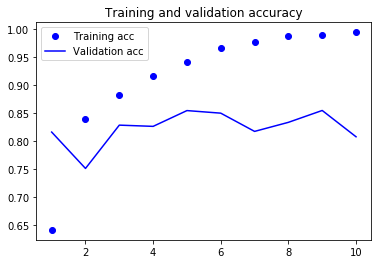

In [127]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

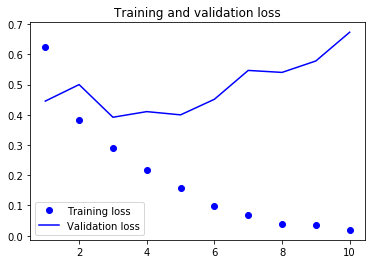

In [128]:
plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

SimpleRNN isn’t good at processing long sequences, such as text.

In [129]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.5357 - acc: 0.7510 - val_loss: 0.3785 - val_acc: 0.8434
Epoch 2/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.3034 - acc: 0.8785 - val_loss: 0.3246 - val_acc: 0.8748
Epoch 3/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.2386 - acc: 0.9101 - val_loss: 0.2831 - val_acc: 0.8872
Epoch 4/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.2074 - acc: 0.9207 - val_loss: 0.2853 - val_acc: 0.8812
Epoch 5/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.1770 - acc: 0.9356 - val_loss: 0.3956 - val_acc: 0.8506
Epoch 6/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.1576 - acc: 0.9409 - val_loss: 0.5963 - val_acc: 0.8458
Epoch 7/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.1450 - acc: 0.9489 - val_loss: 0.3329 - val_a

In [130]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


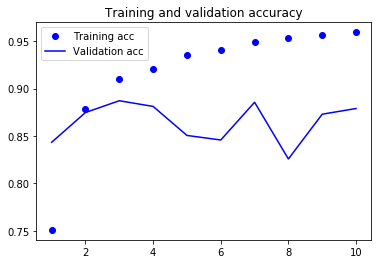

In [131]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

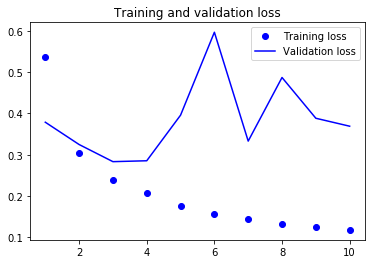

In [132]:
plt.clf()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## ADVANCED USE OF RECURRENT NEURAL NETWORKS

In [4]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2018-04-06 11:44:36--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com... 52.216.225.211
Connecting to s3.amazonaws.com|52.216.225.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: 'jena_climate_2009_2016.csv.zip.1'

                 je  82%[===============>    ]  10.73M  1.06MB/s    eta 3s     ^C
Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [5]:
import os

data_dir = 'jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines)) # a count of 420,551 lines of data

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [6]:
lines[0]

'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

In [8]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [9]:
float_data.shape

(420551, 14)

In [10]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

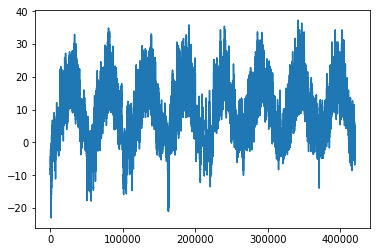

In [13]:
#Temperature over the full temporal range of the dataset (°C)
temp = float_data[:, 1] 
plt.plot(range(len(temp)), temp)

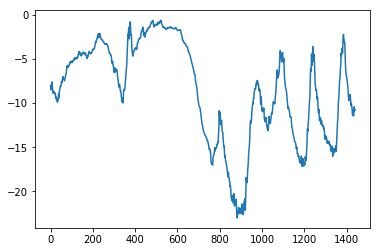

In [15]:
#Temperature over the first 10 days of the dataset (°C)
plt.plot(range(1440), temp[:1440])

In [16]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [17]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [18]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)                        

test_steps = (len(float_data) - 300001 - lookback)              

In [19]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

0.28969941979609765


In [22]:
from keras.optimizers import RMSprop
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 1003s 2s/step - loss: 1.2633 - val_loss: 0.5220
Epoch 2/20
500/500 [==============================] - 977s 2s/step - loss: 0.4080 - val_loss: 0.3259
Epoch 3/20
500/500 [==============================] - 915s 2s/step - loss: 0.2905 - val_loss: 0.3173
Epoch 4/20
500/500 [==============================] - 915s 2s/step - loss: 0.2685 - val_loss: 0.3569
Epoch 5/20
500/500 [==============================] - 901s 2s/step - loss: 0.2572 - val_loss: 0.3112
Epoch 6/20
500/500 [==============================] - 897s 2s/step - loss: 0.2478 - val_loss: 0.3079
Epoch 7/20
500/500 [==============================] - 912s 2s/step - loss: 0.2397 - val_loss: 0.3060
Epoch 8/20
500/500 [==============================] - 928s 2s/step - loss: 0.2342 - val_loss: 0.3261
Epoch 9/20
500/500 [==============================] - 883s 2s/step - loss: 0.2284 - val_loss: 0.3157
Epoch 10/20
500/500 [==============================] - 857s 2s/step - loss: 0.2249 - val_l

In [31]:
history.history

{'loss': [1.2633177686929702,
  0.40801169180870056,
  0.29047193863987925,
  0.2684811970293522,
  0.2571796960532665,
  0.2478285867869854,
  0.23965183115005492,
  0.2342117065191269,
  0.22836171114444734,
  0.22488242825865745,
  0.22189659723639488,
  0.2187168030142784,
  0.21808522725105287,
  0.21526691976189613,
  0.21154724004864692,
  0.21630235216021537,
  0.20834034684300423,
  0.20664195117354392,
  0.20423296955227851,
  0.20242098727822302],
 'val_loss': [0.5220490498299231,
  0.32590029979222884,
  0.31733684597858786,
  0.35693267403377277,
  0.31118626050520065,
  0.3078912962845483,
  0.3060202030578683,
  0.3260764350290852,
  0.31572093672099494,
  0.34589880676576945,
  0.32035762283033964,
  0.33512118359540594,
  0.3455388141215857,
  0.3286675257102242,
  0.3309539451982443,
  0.3324918653482421,
  0.3300890164808756,
  0.3444496479373114,
  0.32988443368754,
  0.3318339526853012]}